### **Name ::** Sagar Kumar 
### **Trade Name ::** Big Data Analytics and Techninques 
### **Batch ::** 3 
### **Intership Task ::** Sentiment Analysis Project

### Libraries Required
1. pandas 
2. numpy 
3. mataplotlib 
4. seaborn 
5. spacy
6. scikit-learn
7. wordCloud
8. spacy.lang.en.stop_words

------

### **IMPORTING THE NECESSARY LIBRARIES**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## **STEP-1 DATA COLLECTION**

### **Importing the First Dataset (Reviews of the yelp reversation system)**

In [3]:
data_yelp = pd.read_csv('yelp_reviews.txt',sep='\t',header=None) ## Importing the dataset
data_yelp.columns = ['Review','Sentiment'] ## Renaming the columns
data_yelp.head() ## Displaying the first 5 rows of the dataset

,Review,Sentiment
0,Wow... Loved this place.,1.0
1,I learned that if an electric slicer is used t...,NaN
2,But they don't clean the chiles?,NaN
3,Crust is not good.,0.0
4,Not tasty and the texture was just nasty.,0.0


### **Importing the Second Datset ( Reviews of the different product of the Amazon)**

In [4]:
data_amazon= pd.read_csv('amazon_reviews.txt',sep='\t',header=None)  ## Importing the dataset

data_amazon.columns = ['Review','Sentiment'] ## Renaming the columns

data_amazon.head() ## Displaying the first 5 rows of the dataset

,Review,Sentiment
0,I try not to adjust the volume setting to avoi...,NaN
1,So there is no way for me to plug it in here i...,0.0
2,"Good case, Excellent value.",1.0
3,I thought Motorola made reliable products!.,NaN
4,Battery for Motorola Razr.,NaN


### **Importing the Second Datset (Reviews of the IMDB Movie App)**

In [5]:
data_imdb= pd.read_csv('imdb_reviews.txt',sep='\t',header=None)  ## Importing the dataset

data_imdb.columns = ['Review','Sentiment'] ## Renaming the columns

data_imdb.head() ## Displaying the first 5 rows of the dataset

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


### **Here I am going to combine the above three datasets of different reviews for Sentiment Analysis**

In [6]:
data = data_yelp.append([data_amazon,data_imdb],ignore_index=True) ## Appending the dataset

data.head() ## Displaying the first 5 rows of the dataset

C:\Users\Radhey_Radhey\AppData\Local\Temp\ipykernel_13304\1708395719.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_yelp.append([data_amazon,data_imdb],ignore_index=True) ## Appending the dataset


,Review,Sentiment
0,Wow... Loved this place.,1.0
1,I learned that if an electric slicer is used t...,NaN
2,But they don't clean the chiles?,NaN
3,Crust is not good.,0.0
4,Not tasty and the texture was just nasty.,0.0


----

## **STEP-2 Exploratory Data Analysis on above Datasets**

#### **Shape of the datasets**

In [7]:
data_yelp.shape, data_amazon.shape, data_imdb.shape, data.shape
print('The number of rows in yelp dataset is',data_yelp.shape[0])
print('The number of rows in amazon dataset is',data_amazon.shape[0])
print('The number of rows in imdb dataset is',data_imdb.shape[0])
print('The number of rows in total dataset is',data.shape[0])

The number of rows in yelp dataset is 3729
The number of rows in amazon dataset is 14609
The number of rows in imdb dataset is 748
The number of rows in total dataset is 19086


### **Checking the Total Values count for positive and negative sentiment in all datasets**

In [9]:
## Checking the distribution of the data
print('The number of positive reviews in yelp dataset is',data_yelp[data_yelp['Sentiment']==1].shape[0])
print('The number of negative reviews in yelp dataset is',data_yelp[data_yelp['Sentiment']==0].shape[0])
print('The number of positive reviews in amazon dataset is',data_amazon[data_amazon['Sentiment']==1].shape[0])
print('The number of negative reviews in amazon dataset is',data_amazon[data_amazon['Sentiment']==0].shape[0])
print('The number of positive reviews in imdb dataset is',data_imdb[data_imdb['Sentiment']==1].shape[0])
print('The number of negative reviews in imdb dataset is',data_imdb[data_imdb['Sentiment']==0].shape[0])
print('The number of positive reviews in total dataset is',data[data['Sentiment']==1].shape[0])
print('The number of negative reviews in total dataset is',data[data['Sentiment']==0].shape[0])


The number of positive reviews in yelp dataset is 500
The number of negative reviews in yelp dataset is 500
The number of positive reviews in amazon dataset is 500
The number of negative reviews in amazon dataset is 500
The number of positive reviews in imdb dataset is 386
The number of negative reviews in imdb dataset is 362
The number of positive reviews in total dataset is 1386
The number of negative reviews in total dataset is 1362


### **Checking the Null Values in the Total Collected Reviews Datasets**

In [12]:
### Checking for the Null Values in the Data 
print('The number of null values in Total dataset is')
data.isnull().sum()

The number of null values in Total dataset is


Review       0
Sentiment    0
dtype: int64

### Now from Above analysis we have seen that the there are 16338 values are null values from the 19086 values so that can affect our model and will not give accurate results during prediction so for that purpose i am going to remove these null values

In [14]:
## Dealing with the Missing Values
data.dropna(inplace=True)


In [15]:
### Checking for the Null Values in the Data after dropping the null values
print('The number of null values in Total dataset is')
data.isnull().sum()

The number of null values in Total dataset is


Review       0
Sentiment    0
dtype: int64

----

## **Step-3 Data Visualization**

c:\Users\Radhey_Radhey\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


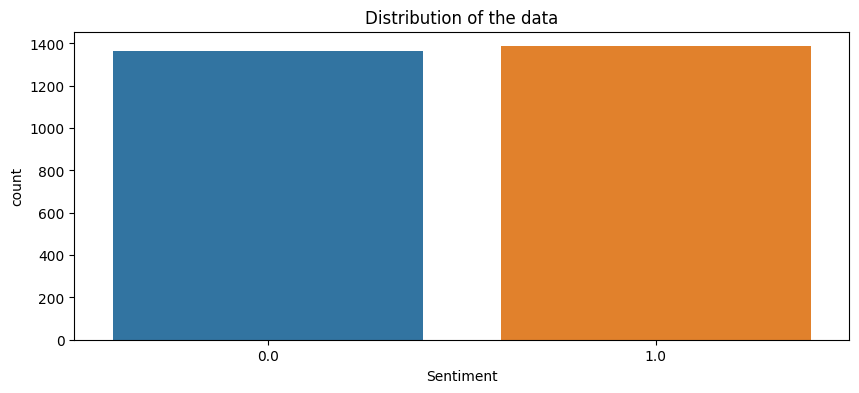

In [18]:
## Barplot for the distribution of the data
plt.figure(figsize=(10,4))
sns.countplot(data['Sentiment'])
plt.title('Distribution of the data')
plt.show()

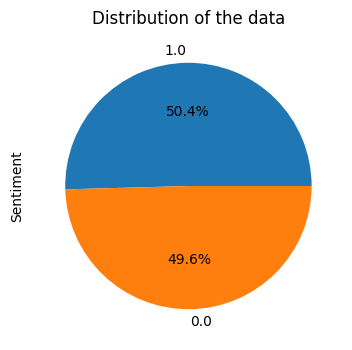

In [19]:
## pie chart for the distribution of the data
plt.figure(figsize=(10,4))
data['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of the data')
plt.show()


(-0.5, 799.5, 399.5, -0.5)

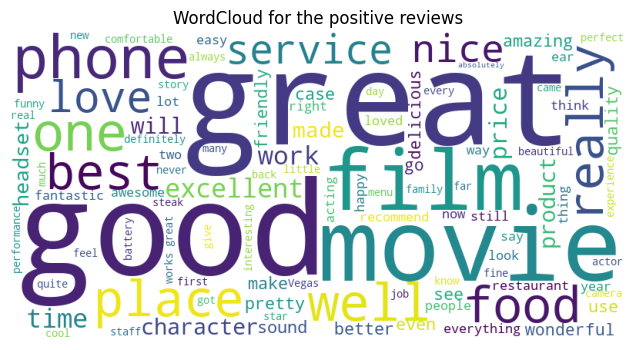

In [25]:
# WordCloud for the positive reviews 
from wordcloud import WordCloud 
plt.figure(figsize=(10,4))
wc = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(data[data['Sentiment']==1]['Review']))
plt.imshow(wc)
plt.title('WordCloud for the positive reviews')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

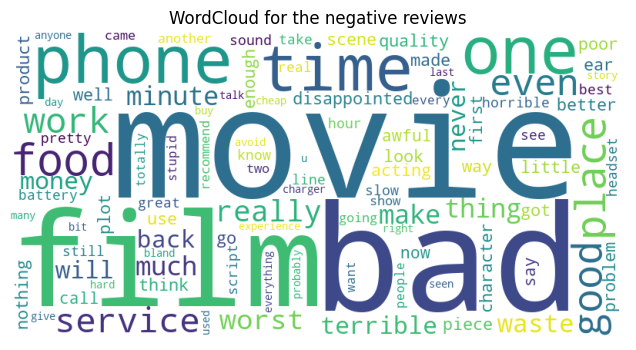

In [21]:
# WordCloud for the negative reviews
plt.figure(figsize=(10,4))
wc = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(data[data['Sentiment']==0]['Review']))
plt.imshow(wc)
plt.title('WordCloud for the negative reviews')
plt.axis('off')

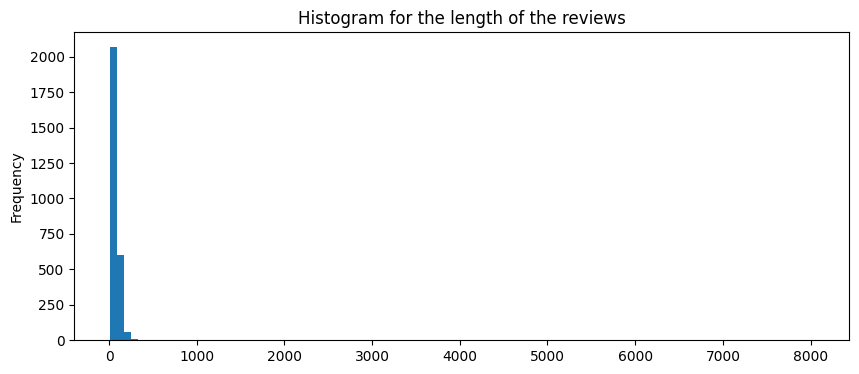

In [27]:
#Histogram for the length of the reviews
plt.figure(figsize=(10,4))
data['length'] = data['Review'].apply(len)
data['length'].plot.hist(bins=100)
plt.title('Histogram for the length of the reviews')
plt.show()

----

## **STEP-4 Data Pre Processing for Text Mining / Sentiment Analysis**

In [28]:
## Importing Libraries for the Preprocessing
from spacy.lang.en.stop_words import STOP_WORDS ## Use for removing the stopwords
import string ## Use for removing the punctuations
import spacy  ## Use for lemmatization
from sklearn.feature_extraction.text import TfidfVectorizer ## Use for creating the TF-IDF matrix
from sklearn.pipeline import Pipeline ## Use for creating the pipeline

In [30]:
## Extract out the punctuations
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [31]:
## Extract out the stopwords from the spacy library these are the stopwords which are not useful for the sentiment analysis
stopwords = list(STOP_WORDS)
stopwords

['top',
 'all',
 'became',
 'latterly',
 'beforehand',
 'three',
 'below',
 'except',
 'make',
 'enough',
 'into',
 'many',
 'rather',
 'itself',
 'less',
 'onto',
 'not',
 '’re',
 'empty',
 'because',
 'one',
 'n‘t',
 'sometime',
 'two',
 'now',
 'out',
 '’s',
 'at',
 'five',
 'eight',
 'been',
 'is',
 'done',
 'across',
 'himself',
 'wherever',
 'something',
 'up',
 'among',
 'forty',
 'his',
 'some',
 'which',
 'above',
 'those',
 'hundred',
 'bottom',
 're',
 'mostly',
 'amongst',
 'myself',
 'various',
 'next',
 'before',
 'else',
 '‘m',
 'former',
 'has',
 'per',
 'eleven',
 'ever',
 'another',
 'though',
 'towards',
 'while',
 'its',
 'anywhere',
 'both',
 'it',
 'to',
 'who',
 'along',
 'thru',
 'me',
 'about',
 'therefore',
 'anyone',
 'down',
 'on',
 'of',
 'than',
 'really',
 'alone',
 'doing',
 'since',
 'was',
 'most',
 'sixty',
 'twelve',
 'often',
 'more',
 'in',
 'anyway',
 'see',
 'someone',
 'herself',
 'becomes',
 'well',
 'anyhow',
 'nine',
 'few',
 'our',
 '‘ve',
 

In [32]:
## Creating the Function for the Cleaning out the Punctuations and Stopwords from the reviews

nlp = spacy.load('en_core_web_sm') ## Loading the spacy library

def text_data_cleaning(sentence):
    doc=nlp(sentence)
    tokens = [] ## list of tokens/words in the sentence

    for token in doc:
        if token.lemma_ != '-PRON-':  ## if the token is not pronoun
            temp = token.lemma_.lower().strip()  ## converting the token into lower case and removing the white spaces
        else:
            temp = token.lower_ ## converting the token into lower case
        tokens.append(temp)
    cleaned_tokens = [] 
    for token in tokens:
        if token not in stopwords and token not in punctuations: ## removing the stopwords and punctuations
            cleaned_tokens.append(token) ## appending the cleaned tokens into the list
    return cleaned_tokens

In [33]:
## Example of the cleaning function
text_data_cleaning('Wow! This is an amazing product. I am very happy with this product.')

['wow', 'amazing', 'product', 'happy', 'product']

In [40]:
tfidf=TfidfVectorizer(tokenizer=text_data_cleaning)

----

## **Step-5 Modeling**

In [35]:
## Importing the Libraries for the Model Building
from sklearn.svm import SVC   
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [38]:
## Divide the data into x and y
x = data['Review']
y = data['Sentiment']

In [39]:
## Split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print('The number of rows in x_train is',x_train.shape[0])
print('The number of rows in x_test is',x_test.shape[0])
print('The number of rows in y_train is',y_train.shape[0])
print('The number of rows in y_test is',y_test.shape[0])

The number of rows in x_train is 2198
The number of rows in x_test is 550
The number of rows in y_train is 2198
The number of rows in y_test is 550


In [43]:
## Creating the pipeline for the model building
clf = Pipeline([('tfidf',tfidf),('clf',SVC())])

## Fitting the model
clf.fit(x_train,y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x00000190C9384DC0>)),
                ('clf', SVC())])

----

## **Step-6 Evaluation of Model**

In [44]:
## Predicting the values for the test data
y_pred=clf.predict(x_test)
y_pred

array([1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0.

In [56]:
## Creating DataFrame for Actual Values and Predicted Values
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head()

,Actual,Predicted
18854,1.0,1.0
18980,0.0,0.0
4869,1.0,0.0
5759,1.0,0.0
18998,0.0,0.0


In [45]:
## Checking the accuracy of the model
print('The accuracy of the model is',accuracy_score(y_test,y_pred))

The accuracy of the model is 0.8


In [46]:
## Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[237  48]
 [ 62 203]]


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       285
         1.0       0.81      0.77      0.79       265

    accuracy                           0.80       550
   macro avg       0.80      0.80      0.80       550
weighted avg       0.80      0.80      0.80       550



### **Prediction**

In [55]:
## Predicting the values for the new reviews
print(clf.predict(['This is a very good product']))
print(clf.predict(['This is a very bad product']))
print(clf.predict(['Kamaal ki movie hai']))
print(clf.predict(['Ye jgha rehne ke liye bilkul bhi achha nhi hai']))


[1.]
[0.]
[1.]
[0.]
